##### Se cargan las librerías

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
#from sklearn.model_selection import learning_curve
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
#from sklearn.model_selection import ShuffleSplit



#### Se carga un dataset de scikit learn

In [ ]:
ds = datasets.load_diabetes()
print datasets.load_diabetes()

##### Se mezclan los datos y se los divide en datos de entrenamiento y datos de validacion

In [ ]:
print len(ds.data)
print ds.data.shape
print len(ds.target)
print ds.target.shape

In [2]:
#X_train = X[:.9 * n_sample]
#y_train = y[:.9 * n_sample]
#X_test = X[.9 * n_sample:]
#y_test = y[.9 * n_sample:]
def cargar_datos_prueba():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    # Se recorren todos los valores de datos(data) y labels (targets) y se 
    # elimina cualquier valor que sea igual a cero.
    X = X[y != 0, :2]
    y = y[y != 0]
    print "X: ",len(X)
    print "y: ",len(y)
    # Se genera una division aleatoria entre datos de prueba y entrenamiento
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.60, random_state=42)
    
    return (X,y,X_train,y_train,X_test, y_test)

    #Backup de la version anterior.
    #n_sample = len(X)
    #np.random.seed(0)
    #order = np.random.permutation(n_sample)
    #X = X[order]
    #y = y[order].astype(np.float)
    #return (X[:.9 * n_sample],y[:.9 * n_sample],X[.9 * n_sample:],y[.9 * n_sample:])


In [3]:

X,y,X_train,y_train,X_test, y_test = cargar_datos_prueba()

X:  100
y:  100


#### Metodo para graficar los elementos del modelo

In [4]:
def graficar(nombre_kernel,clf):
    #plt.figure(nro_fig)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    #plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title("Kernel "+nombre_kernel)
    plt.show()

    

In [5]:
def plot_matrix(clf, X_test, y_test):
    plt.clf()
    plt.imshow(confusion_matrix(clf.predict(X_test), y_test),
               interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    #return plt


#### Se entrena el modelo y se retornan las predicciones para un conjunto de datos

In [6]:
def entrenar_kernel(nombre_kernel):
    clf = svm.SVC(kernel=nombre_kernel, gamma=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return (clf,y_pred)


##### Para las diferencias hacer: 
##### 1. classication_report(), con valores como recall, y precision, f1-score.
##### 2. score(precision).
##### 3. Matriz de confusion.
##### de los datos de prueba contra los datos de validacion.

In [7]:
def imprimir_estadisticas(nombre_kernel,mykernel,X_test,y_pred,y_test):
    print ""
    print "Kernel testeado: ",nombre_kernel
    print classification_report(y_pred, y_test)
    print "La matriz de confusion obtenida es la siguiente:"
    print confusion_matrix(y_pred, y_test)
    print ""
    print "Precision media del kernel: ",mykernel.score(X_test, y_test)
    print ""
    print ""
    
    
    

##### Se entrenan y compara el rendimiento de los kernels con los datos de prueba

In [ ]:
ShuffleSplit?



Kernel testeado:  poly
             precision    recall  f1-score   support

          1       0.35      0.93      0.51        14
          2       0.96      0.48      0.64        46

avg / total       0.82      0.58      0.61        60

La matriz de confusion obtenida es la siguiente:
[[13  1]
 [24 22]]

Precision media del kernel:  0.583333333333




/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


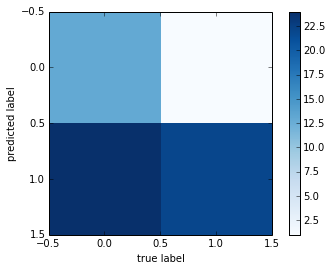

/usr/lib/pymodules/python2.7/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':


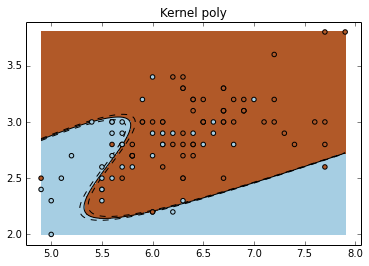

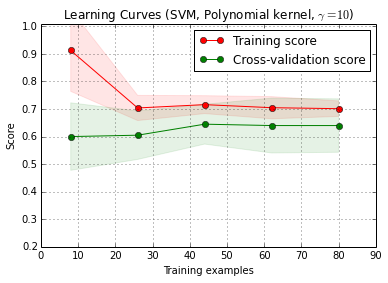

In [8]:
kernel2,y_pred2 = entrenar_kernel('poly')
imprimir_estadisticas('poly',kernel2,X_test,y_pred2,y_test)
plot_matrix(kernel2, X_test, y_test)
graficar('poly',kernel2)

#Se grafica la curva de aprendizaje para detectar overfitting
title = "Learning Curves (SVM, Polynomial kernel, $\gamma=10$)"

# SVC is more expensive so we do a lower number of CV iterations:

cv2 = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
estimator2 = kernel2
plot_learning_curve(estimator2, title, X, y, (0.2, 1.01), cv=cv2, n_jobs=4)




Kernel testeado:  rbf
             precision    recall  f1-score   support

          1       0.22      0.73      0.33        11
          2       0.87      0.41      0.56        49

avg / total       0.75      0.47      0.51        60

La matriz de confusion obtenida es la siguiente:
[[ 8  3]
 [29 20]]

Precision media del kernel:  0.466666666667




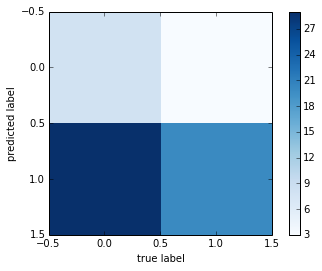

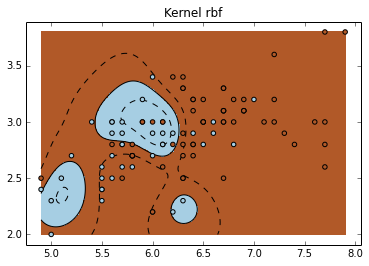

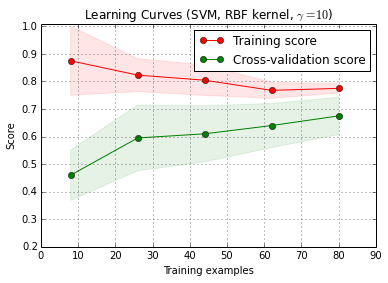

In [9]:
kernel,y_pred = entrenar_kernel('rbf')
imprimir_estadisticas('rbf',kernel,X_test,y_pred,y_test)
plot_matrix(kernel, X_test, y_test)
graficar('rbf',kernel)

#Sacado de  -->
#http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
#Se grafica la curva de aprendizaje para detectar overfitting
title = "Learning Curves (SVM, RBF kernel, $\gamma=10$)"

# SVC is more expensive so we do a lower number of CV iterations:

cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
estimator = kernel
plot_learning_curve(estimator, title, X, y, (0.2, 1.01), cv=cv, n_jobs=4)
#plot_learning_curve(estimator, title, X, y, (0.2, 1.01), n_jobs=4)
